In [15]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
# ada_bag_scores = np.load("ada_bag_scores.npy")
# cart_rnf_scores = np.load("cart_rnf_scores.npy")
# xgb_cat_scores = np.load("xgb_cat_scores.npy")
# print(xgb_cat_scores.shape)
# scores = np.concatenate((ada_bag_scores, cart_rnf_scores, xgb_cat_scores))
# ada_bag_scores = np.mean(ada_bag_scores, axis=1)
scores = np.load("scores.npy")
scores = np.mean(scores, axis=1)
scores = np.mean(scores, axis=1).T

# heart_ada_bag = np.load("heart_ada_bag.npy")

# ada_bag_scores = np.mean(ada_bag_scores, axis=1)
# scores = np.mean(ada_bag_scores)
# ada_bag_scores = np.mean(ada_bag_scores, axis=1).T
# scores = ada_bag_scores
# scores = np.mean(scores, axis=0).T
# scores = np.load("results.npy")
# scores = np.mean(scores, axis=1).T


In [16]:
scores.shape

(5, 6)

In [17]:
scores

array([[0.66959884, 0.70928727, 0.7057311 , 0.72177101, 0.66645963,
        0.66209615],
       [0.68778867, 0.76248967, 0.7663    , 0.77728103, 0.68727641,
        0.75063315],
       [0.77081097, 0.81883023, 0.81879459, 0.82876387, 0.76895661,
        0.80054769],
       [0.67464346, 0.72578153, 0.72693204, 0.7391473 , 0.67367098,
        0.69797036],
       [0.70751584, 0.72703614, 0.7509976 , 0.75417026, 0.70569212,
        0.72467444]])

In [18]:
scores[:, 1]

array([0.70928727, 0.76248967, 0.81883023, 0.72578153, 0.72703614])

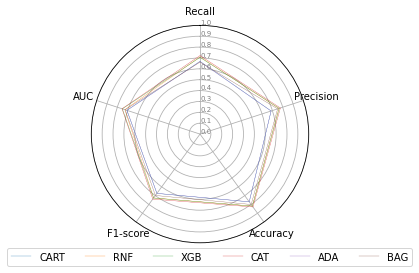

In [19]:
# metryki i metody
metrics = ["Recall", "Precision", "Accuracy", "F1-score", "AUC"]
# methods = ["ADA", "BAG", "CART", "RNF", "XGB", "CAT"]
methods = ["CART", "RNF", "XGB", "CAT","ADA", "BAG" ]
N = scores.shape[0]
# N =5
# kat dla kazdej z osi
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# spider plot
ax = plt.subplot(111, polar=True)

# pierwsza os na gorze
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# po jednej osi na metryke
plt.xticks(angles[:-1], metrics)

# os y
ax.set_rlabel_position(0)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
["0.0","0.1","0.2","0.3","0.4","0.5","0.6","0.7","0.8","0.9","1.0"],
color="grey", size=7)
plt.ylim(0,1)

# Dodajemy wlasciwe ploty dla kazdej z metod
for method_id, method in enumerate(methods):
    values=scores[:,method_id].tolist()
    # print(values.shape)
    values += values[:1]

    ax.plot(angles, values, linewidth=0.3, linestyle='solid', label=method)

# Dodajemy legende
plt.legend(bbox_to_anchor=(1.5, 0), ncol=6)
# Zapisujemy wykres
plt.savefig("radar", dpi=200)

## Wilcoxon's rank test

In [1]:
clfs = ["CART", "RNF", "XGB", "CAT", "ADA", "BAG"]

datasets = ['breast', 'campus', 'churn', 'climate',
            'compas', 'diabetes', 'german', 'heart',
            'adult', 'student', 'bank', 'credit']

In [10]:
from scipy.stats import rankdata

def wilcoxon_test(results):
    mean_results = np.mean(results, axis=2).T
    print("\nMean results:\n", mean_results)

    ranks = []
    for mr in mean_results:
        ranks.append(rankdata(mr).tolist())
    ranks = np.array(ranks)
    print("\nRanks:\n", ranks)

    mean_ranks = np.mean(ranks, axis=0)
    print(mean_ranks)

    from scipy.stats import ranksums

    alfa = .05
    w_statistic = np.zeros((len(clfs), len(clfs)))
    p_value = np.zeros((len(clfs), len(clfs)))

    for i in range(len(clfs)):
        for j in range(len(clfs)):
            w_statistic[i, j], p_value[i, j] = ranksums(ranks.T[i], ranks.T[j])
    
    from tabulate import tabulate

    headers = clfs
    names_column = np.expand_dims((np.array(clfs)), axis=1)
    w_statistic_table = np.concatenate((names_column, w_statistic), axis=1)
    w_statistic_table = tabulate(w_statistic_table, headers, floatfmt=".2f")
    p_value_table = np.concatenate((names_column, p_value), axis=1)
    p_value_table = tabulate(p_value_table, headers, floatfmt=".2f")
    print("\nw-statistic:\n", w_statistic_table, "\n\np-value:\n", p_value_table)
    
    advantage = np.zeros((len(clfs), len(clfs)))
    advantage[w_statistic > 0] = 1
    advantage_table = tabulate(np.concatenate(
        (names_column, advantage), axis=1), headers)
    print("\nAdvantage:\n", advantage_table)

    significance = np.zeros((len(clfs), len(clfs)))
    significance[p_value <= alfa] = 1
    significance_table = tabulate(np.concatenate(
        (names_column, significance), axis=1), headers)
    print("\nStatistical significance (alpha = 0.05):\n", significance_table)

    stat_better = significance * advantage
    stat_better_table = tabulate(np.concatenate(
        (names_column, stat_better), axis=1), headers)
    print("Statistically significantly better:\n", stat_better_table)


In [4]:
import numpy as np
scores = np.load("./scores.npy")

In [8]:
recall_scores = scores[:, :,:, 0]
precision_scores = scores[:,:,:,1]
accuracy_scores = scores[:,:,:,2]
f1_scores = scores[:,:,:,3]
auc_scores = scores[:, :, :, 4]

In [11]:
wilcoxon_test(recall_scores)


Mean results:
 [[0.91038961 0.93376623 0.9530303  0.9482684  0.9012987  0.91038961]
 [0.85857143 0.95333333 0.89952381 0.94       0.85809524 0.89142857]
 [0.51399594 0.46391384 0.49780257 0.50221916 0.5100623  0.46048971]
 [0.94542857 1.         0.99387755 1.         0.95138776 0.97379592]
 [0.27612299 0.30473879 0.23660428 0.24114973 0.30928013 0.31380913]
 [0.58903134 0.5968661  0.61509972 0.59700855 0.55940171 0.50384615]
 [0.77971014 0.91134576 0.85409938 0.90273292 0.76679089 0.79691511]
 [0.68571429 0.73333333 0.72857143 0.73809524 0.66666667 0.63809524]
 [0.62810672 0.62632019 0.66114081 0.65961036 0.6212201  0.58984499]
 [0.59675325 0.73008658 0.68896104 0.75887446 0.5965368  0.60519481]
 [0.48515495 0.39969711 0.48534972 0.50179906 0.48723506 0.41709164]
 [0.7662069  0.85804598 0.85471264 0.87149425 0.76954023 0.84425287]]

Ranks:
 [[2.5 4.  6.  5.  1.  2.5]
 [2.  6.  4.  5.  1.  3. ]
 [6.  2.  3.  4.  5.  1. ]
 [1.  5.5 4.  5.5 2.  3. ]
 [3.  4.  1.  2.  5.  6. ]
 [3.  4.  6

In [12]:
wilcoxon_test(precision_scores)


Mean results:
 [[0.87533387 0.94971743 0.97205628 0.98114719 0.86948689 0.95377129]
 [0.87620125 0.87196558 0.89676587 0.89405268 0.86696935 0.89504579]
 [0.49657223 0.76377832 0.7195133  0.76564438 0.4913552  0.69396554]
 [0.94602857 0.92173305 0.95741085 0.94861162 0.94815154 0.9415912 ]
 [0.49352155 0.48385432 0.53130407 0.5343373  0.48396714 0.48265452]
 [0.58252724 0.69643456 0.66071036 0.68855095 0.55796774 0.63687323]
 [0.77170811 0.78245928 0.79546873 0.79588025 0.76287374 0.80299822]
 [0.71138783 0.7343381  0.72668569 0.74571859 0.72076367 0.7192544 ]
 [0.61680113 0.73421423 0.77566128 0.7838493  0.64766408 0.72759641]
 [0.60690493 0.6898827  0.66574293 0.67768287 0.60385414 0.68976836]
 [0.47024442 0.65306022 0.63073722 0.65425351 0.47138119 0.60133574]
 [0.80623292 0.86843821 0.86354339 0.85764368 0.82288224 0.86274313]]

Ranks:
 [[2. 3. 5. 6. 1. 4.]
 [3. 2. 6. 4. 1. 5.]
 [2. 5. 4. 6. 1. 3.]
 [3. 1. 6. 5. 4. 2.]
 [4. 2. 5. 6. 3. 1.]
 [2. 6. 4. 5. 1. 3.]
 [2. 3. 4. 5. 1. 6.]

In [13]:
wilcoxon_test(accuracy_scores)


Mean results:
 [[0.91741855 0.95610902 0.9718985  0.97368421 0.91212406 0.94912281]
 [0.81493506 0.87077922 0.85649351 0.87987013 0.80995671 0.84718615]
 [0.7944     0.8613     0.858      0.8669     0.7922     0.8485    ]
 [0.9        0.92222222 0.9537037  0.95       0.90740741 0.92037037]
 [0.64112026 0.63609594 0.65392021 0.65440565 0.63577442 0.63463937]
 [0.70562201 0.76695147 0.75384484 0.76303828 0.69007177 0.72520506]
 [0.68368687 0.75872727 0.74168687 0.76775758 0.66861616 0.71972727]
 [0.72454106 0.75275362 0.75072464 0.76362319 0.72198068 0.71565217]
 [0.81645611 0.85537014 0.87232417 0.87416689 0.82708333 0.84802966]
 [0.56730769 0.66801282 0.63820513 0.66839744 0.56698718 0.63519231]
 [0.87578252 0.90489048 0.90650508 0.91061913 0.8760701  0.89942724]
 [0.80846154 0.87275058 0.86822844 0.87270396 0.81920746 0.86351981]]

Ranks:
 [[2. 4. 5. 6. 1. 3.]
 [2. 5. 4. 6. 1. 3.]
 [2. 5. 4. 6. 1. 3.]
 [1. 4. 6. 5. 2. 3.]
 [4. 3. 5. 6. 2. 1.]
 [2. 6. 4. 5. 1. 3.]
 [2. 5. 4. 6. 1. 3.]

In [14]:
wilcoxon_test(f1_scores)


Mean results:
 [[0.89125762 0.94014313 0.96172204 0.96397101 0.88373937 0.92986739]
 [0.86585705 0.90966929 0.89569593 0.91433519 0.8607695  0.88977032]
 [0.50475346 0.57626943 0.58810966 0.60598499 0.50002371 0.55318136]
 [0.94529352 0.95922184 0.97516421 0.97347898 0.94928522 0.95710158]
 [0.35358416 0.37310199 0.32626828 0.33129652 0.37654102 0.37952216]
 [0.58253626 0.64001728 0.63532018 0.63527392 0.55694924 0.55879605]
 [0.77530685 0.84115307 0.82262315 0.84516537 0.76380061 0.79931481]
 [0.69471449 0.73221035 0.72578817 0.73927495 0.68926855 0.67173023]
 [0.62233518 0.6758249  0.71372476 0.71621508 0.63367389 0.65129479]
 [0.59958715 0.70553756 0.67435172 0.71438567 0.5977683  0.64301654]
 [0.47751747 0.49552405 0.5483796  0.56763524 0.47911142 0.49224143]
 [0.78297829 0.8607055  0.85603675 0.8627507  0.79312095 0.84980761]]

Ranks:
 [[2. 4. 5. 6. 1. 3.]
 [2. 5. 4. 6. 1. 3.]
 [2. 4. 5. 6. 1. 3.]
 [1. 4. 6. 5. 2. 3.]
 [3. 4. 1. 2. 5. 6.]
 [3. 6. 5. 4. 1. 2.]
 [2. 5. 4. 6. 1. 3.]

In [15]:
wilcoxon_test(auc_scores)


Mean results:
 [[0.91590909 0.95140693 0.96806277 0.96853896 0.90993506 0.94114719]
 [0.79       0.82071429 0.83309524 0.845      0.78142857 0.82071429]
 [0.69006276 0.71343394 0.72397364 0.73120438 0.6872167  0.70412366]
 [0.68771429 0.545      0.76443878 0.7125     0.70319388 0.66439796]
 [0.55984991 0.56231902 0.56099735 0.56238847 0.56307835 0.5632018 ]
 [0.67851567 0.72743305 0.72154986 0.72450427 0.65970085 0.67392308]
 [0.61985507 0.65733954 0.66704969 0.67803313 0.60339545 0.66845756]
 [0.72135714 0.75133333 0.74911905 0.76188095 0.71766667 0.71004762]
 [0.75215491 0.77717398 0.80022818 0.80091933 0.75680304 0.75988711]
 [0.5637361  0.66095832 0.63255241 0.65901239 0.56362788 0.63805492]
 [0.70634439 0.68575863 0.7238257  0.73329032 0.70740952 0.69021014]
 [0.80469075 0.87156267 0.86707854 0.87277094 0.81484948 0.86192802]]

Ranks:
 [[2.  4.  5.  6.  1.  3. ]
 [2.  3.5 5.  6.  1.  3.5]
 [2.  4.  5.  6.  1.  3. ]
 [3.  1.  6.  5.  4.  2. ]
 [1.  3.  2.  4.  5.  6. ]
 [3.  6.  4

## Feauture Importantes

In [18]:
import pandas as pd 
feature_importances = []
# black-box models/results_analysis/partial_dependence_feat_important
for dataset_name in datasets:
    temp_df = pd.read_csv(f"./partial_dependence_feat_important/results/mp_{dataset_name}.csv")
    feature_importances.append(temp_df)

In [34]:
clfs_results_mp = np.zeros(shape=(12, 10))
# for clf_id
for dataset_id in range(12):
    for clf_id in range(10):
        clfs_results_mp[dataset_id, clf_id] = feature_importances[dataset_id]['0'][clf_id]

In [37]:
clfs_results_mp.sum(axis=0).T

array([ 0.        , 11.5630789 , 10.09137176,  9.1318883 ,  1.81242919,
        8.96682644,  9.11704973, 12.72226536, 18.0868425 , 12.73852999])

## Partial Dependence

In [38]:
import pandas as pd 
partial_dependences= []
# black-box models/results_analysis/partial_dependence_feat_important
for dataset_name in datasets:
    temp_df = pd.read_csv(f"./partial_dependence_feat_important/results/pd_{dataset_name}.csv")
    partial_dependences.append(temp_df)

In [39]:
clfs_results_pd = np.zeros(shape=(12, 10))
# for clf_id
for dataset_id in range(12):
    for clf_id in range(10):
        clfs_results_pd[dataset_id, clf_id] = partial_dependences[dataset_id]['0'][clf_id]

In [40]:
clfs_results_pd.sum(axis=0).T

array([   0.        ,  482.91805357,  557.76550105,  507.2128401 ,
        534.82207339,  495.61026511,  495.24461827,  840.67195729,
       1671.23657263, 1168.48245063])